# Calculate the monthly Sun position

###Study Ecliptic for path of Sun
Create a DataFrame with monthly info from the livetime cubes, adding solar positions for the start of each month. Save the result as a csv file

In [4]:
%matplotlib inline
import pyfits, glob, pickle
from skymaps import SolarSystem, JulianDate, SkyDir

In [43]:
#check mission times for the months; extract TSTART and TSTOP from the livetime cubes
lc=sorted(glob.glob(os.path.expandvars('$FERMI/data/P8_P301/Source/ltcube_*_zmax100.fits'))); 
print 'Livetime cubes for %d months found' % len(lc)

Livetime cubes for 73 months found


In [53]:
month_dict = dict()
for i in range(len(lc)):
    h = pyfits.open(lc[i])[0].header; 
    month_dict[i]=dict( tstart=h['TSTART'], tstop=h['TSTOP'],  filename=lc[i].split('/')[-1])

In [54]:
monthdf=pd.DataFrame(month_dict).T #, columns=range(1,len(lc))).T
monthdf.index=range(1,len(lc)+1)
monthdf.index.name='month'

,filename,tstart,tstop
month,,,
1,ltcube_001_zmax100.fits,2.395574e+08,2.4196e+08
2,ltcube_002_zmax100.fits,2.4196e+08,2.4459e+08
3,ltcube_003_zmax100.fits,2.4459e+08,2.4722e+08
4,ltcube_004_zmax100.fits,2.4722e+08,2.4985e+08
5,ltcube_005_zmax100.fits,2.4985e+08,2.5248e+08
6,ltcube_006_zmax100.fits,2.5248e+08,2.5511e+08
7,ltcube_007_zmax100.fits,2.5511e+08,2.5774e+08
8,ltcube_008_zmax100.fits,2.5774e+08,2.6037e+08
9,ltcube_009_zmax100.fits,2.6037e+08,2.63e+08


In [55]:
ss=SolarSystem()
spd = JulianDate.secondsPerDay
jdmission = JulianDate.missionStart().seconds()/spd
zaxis = SkyDir(270,90-23.439281) #NP in Ecliptic

tss=[]; sun_ra=[]; sun_dec=[]
for t in monthdf.tstart:
    sun_start_dir = ss.direction(JulianDate((t/spd+jdmission)))
    sun_ra.append(sun_start_dir.ra()); sun_dec.append(sun_start_dir.dec())
    sdstart = sun_start_dir.zenithCoords(zaxis);
    assert abs(sdstart[1])<0.01, 'bad ecliptic? %s' %sdstart
    tss.append(sdstart[0])

In [61]:
monthdf['sun_ra']  = np.asarray(sun_ra, np.float32)
monthdf['sun_dec'] = np.asarray(sun_dec, np.float32)
monthdf['sun_elon'] = np.array(tss, np.float32)
monthdf.to_csv(os.path.expandvars('$FERMI/skymodels/P301_monthly/month_info.csv'))

,filename,tstart,tstop,sun_ra,sun_dec,sun_elon
month,,,,,,
1,ltcube_001_zmax100.fits,2.395574e+08,2.4196e+08,134.968216,17.051950,132.504395
2,ltcube_002_zmax100.fits,2.4196e+08,2.4459e+08,160.842560,8.097127,159.261002
3,ltcube_003_zmax100.fits,2.4459e+08,2.4722e+08,188.226349,-3.549619,188.954651
4,ltcube_004_zmax100.fits,2.4722e+08,2.4985e+08,216.767197,-14.547215,219.159363
5,ltcube_005_zmax100.fits,2.4985e+08,2.5248e+08,248.185455,-21.924107,249.834747
6,ltcube_006_zmax100.fits,2.5248e+08,2.5511e+08,281.747650,-22.998751,280.802155
7,ltcube_007_zmax100.fits,2.5511e+08,2.5774e+08,314.250305,-17.251461,311.790009
8,ltcube_008_zmax100.fits,2.5774e+08,2.6037e+08,343.884216,-6.861929,342.519867
9,ltcube_009_zmax100.fits,2.6037e+08,2.63e+08,11.770779,5.053887,12.795798


## Make table of ecliptic coordinates

In [12]:
from skymaps import Band
band = Band(512)
npix = 12* 512**2
%time ecliptic = np.array([np.array(band.dir(i).zenithCoords(zaxis),np.float32) for i in range(npix)])

CPU times: user 20.3 s, sys: 342 ms, total: 20.7 s
Wall time: 20.6 s


### Make plots to test

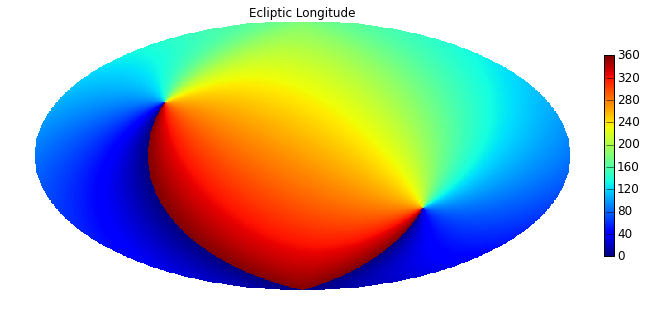

In [13]:
from uw.like2.pub import healpix_map; reload(healpix_map);
eclon = healpix_map.HParray( 'eclon', ecliptic[:,0],)
eclon.plot(title='Ecliptic Longitude');

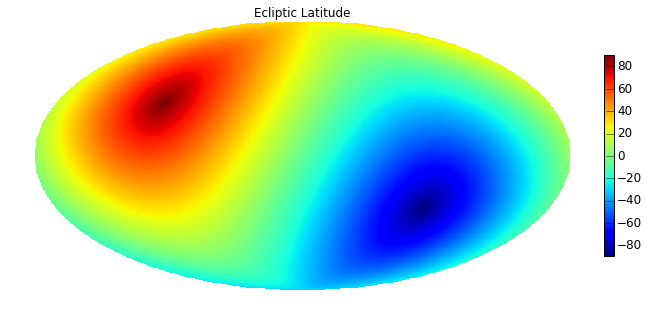

In [17]:
eclat = healpix_map.HParray( 'eclat', ecliptic[:,1],)
eclat.plot(title='Ecliptic Latitude');

###Save the table to a file

In [15]:
import pickle
pickle.dump(ecliptic, open(os.path.expandvars('$FERMI/misc/ecliptic_512.pickle'), 'w'))

In [16]:
%time x= pickle.load(open(os.path.expandvars('$FERMI/misc/ecliptic_512.pickle')))

CPU times: user 457 ms, sys: 19 ms, total: 476 ms
Wall time: 479 ms


So, is this worth it? 20 s to create a table, only in an initialization phase, vs. 0.5 s to load a file.